In [34]:
import numpy as np 
import os
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [35]:
def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, image_size)
            images.append(img_resized.flatten())  
            labels.append(label)
    return images, labels

# Paths to cat and dog folders
cat_folder = 'C:/Users/akshi/OneDrive/Desktop/PRODIGY/PRODIGY_ML_03/test_set/cats'
dog_folder = 'C:/Users/akshi/OneDrive/Desktop/PRODIGY/PRODIGY_ML_03/test_set/dogs'

# Load images
cat_images, cat_labels = load_images_from_folder(cat_folder, 0)  # Label 0 for cats
dog_images, dog_labels = load_images_from_folder(dog_folder, 1)  # Label 1 for dogs

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [38]:
y_pred = svm_model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6395061728395062
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63       209
           1       0.61      0.68      0.65       196

    accuracy                           0.64       405
   macro avg       0.64      0.64      0.64       405
weighted avg       0.64      0.64      0.64       405



The image is classified as: Cat


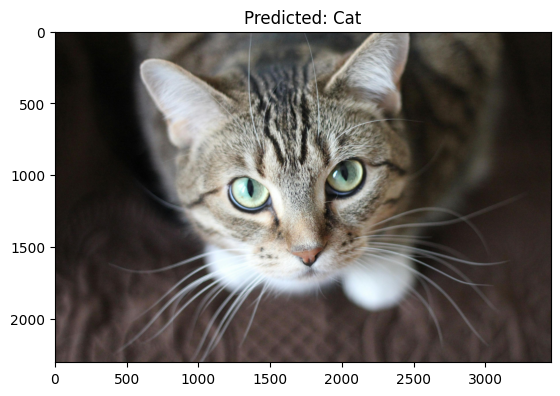

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess a single image
def preprocess_image(image_path, image_size=(64, 64)):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, image_size)  # Resize image
    img_flattened = img_resized.flatten()  # Flatten the image to match SVM input
    return img_flattened

image_path = 'C:/Users/akshi/OneDrive/Desktop/PRODIGY/PRODIGY_ML_03/pexels-kmerriman-20787.jpg' 
image_data = preprocess_image(image_path)
prediction = svm_model.predict([image_data])

# Output the result
if prediction == 0:
    print("The image is classified as: Cat")
else:
    print("The image is classified as: Dog")

# Display the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img_rgb)
plt.title(f"Predicted: {'Cat' if prediction == 0 else 'Dog'}")
plt.show()
